In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%%capture
%cd drive/MyDrive/genrecog/
%pip install speechbrain


In [3]:
from genrecog.preprocess.preprocessor import Preprocessor
from genrecog.nnet.CNN import VanillaConv1d
from genrecog.tools.trainer import CNNFbankTrainer
import torch
from torch.utils.data import TensorDataset, DataLoader 
import datetime

torch.manual_seed(0)

In [4]:
# Load dataset

train_preprcessor = Preprocessor('dataset/npz_files/train.npz')
test_preprcessor = Preprocessor('dataset/npz_files/test.npz')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
X, y = train_preprcessor.as_shuffled_torch()
X_test, y_test = test_preprcessor.as_shuffled_torch()

dataset = TensorDataset(X.to(device), y.to(device))
validation_dataset, train_dataset = torch.utils.data.random_split(dataset, (400, 3200))
test_dataset = TensorDataset(X_test.to(device), y_test.to(device))

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=400)
validation_dataloader = DataLoader(validation_dataset, shuffle=True, batch_size=400)
test_dataloader = DataLoader(test_dataset, shuffle=True, batch_size=400)

In [6]:
lr = 0.001
model = VanillaConv1d().to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
model

VanillaConv1d(
  (batch_norm): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (input_layer): Sequential(
    (0): Conv1d(40, 128, kernel_size=(8,), stride=(1,), padding=(8,))
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (hidden_layer): Sequential(
    (0): Conv1d(128, 128, kernel_size=(8,), stride=(1,), padding=(8,))
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (out_linear): Linear(in_features=384, out_features=10, bias=True)
)

In [7]:
trainer = CNNFbankTrainer(
    model=model, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=100)
trainer.train()

============================== EPOCH 1 =================================
Training accuracy 34.00
Training loss 1.8903
Validation accuracy 14.75
Validation loss 5.6893
============================== EPOCH 2 =================================
Training accuracy 57.09
Training loss 1.2205
Validation accuracy 32.50
Validation loss 2.1749
============================== EPOCH 3 =================================
Training accuracy 64.09
Training loss 1.0113
Validation accuracy 44.50
Validation loss 1.4932
============================== EPOCH 4 =================================
Training accuracy 71.62
Training loss 0.8099
Validation accuracy 53.00
Validation loss 1.2465
============================== EPOCH 5 =================================
Training accuracy 78.00
Training loss 0.6529
Validation accuracy 54.50
Validation loss 1.3580
============================== EPOCH 6 =================================
Training accuracy 81.91
Training loss 0.5339
Validation accuracy 45.00
Validation loss 1.633

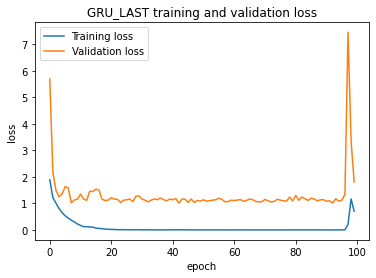

In [8]:
trainer.plot_loss("VanillaConv1D training and validation loss")

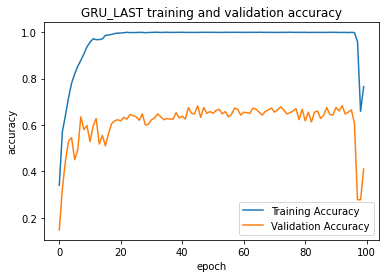

In [9]:
trainer.plot_accuracies("VanillaConv1D training and validation accuracy")

In [10]:
trainer.eval(test_dataloader)

(tensor([6, 5, 7, 5, 7, 1, 1, 7, 6, 9, 5, 4, 2, 1, 4, 5, 4, 5, 7, 4, 1, 4, 5, 6,
         5, 5, 5, 6, 6, 1, 4, 1, 1, 1, 4, 6, 1, 4, 7, 4, 6, 6, 1, 2, 0, 1, 5, 1,
         5, 9, 1, 6, 7, 6, 8, 6, 1, 6, 6, 3, 7, 7, 6, 4, 6, 4, 3, 5, 6, 9, 5, 5,
         6, 4, 7, 7, 1, 5, 1, 0, 5, 6, 1, 3, 3, 1, 1, 1, 8, 7, 4, 5, 6, 5, 1, 4,
         1, 1, 6, 5, 9, 3, 6, 7, 6, 1, 1, 1, 5, 5, 6, 6, 6, 4, 1, 6, 6, 1, 5, 6,
         1, 6, 6, 7, 6, 1, 6, 7, 1, 5, 1, 5, 1, 3, 6, 4, 4, 1, 1, 5, 6, 5, 3, 7,
         5, 5, 6, 4, 6, 6, 6, 7, 8, 6, 6, 6, 1, 5, 7, 4, 1, 5, 6, 7, 5, 5, 6, 1,
         4, 1, 4, 7, 5, 3, 5, 8, 5, 5, 1, 6, 6, 1, 1, 7, 3, 4, 4, 1, 6, 4, 5, 5,
         1, 7, 7, 5, 5, 7, 7, 4, 6, 7, 0, 1, 6, 1, 5, 1, 6, 5, 1, 1, 1, 6, 6, 6,
         1, 7, 6, 6, 6, 7, 1, 6, 6, 4, 6, 7, 5, 7, 1, 1, 6, 4, 4, 1, 5, 5, 6, 6,
         6, 4, 7, 7, 1, 4, 7, 1, 6, 5, 7, 6, 6, 6, 4, 5, 1, 6, 6, 9, 5, 7, 7, 4,
         1, 5, 1, 1, 1, 6, 8, 6, 4, 1, 5, 7, 5, 6, 6, 1, 5, 7, 4, 4, 4, 1, 2, 4,
         6, 4, 4, 1, 1, 6, 9

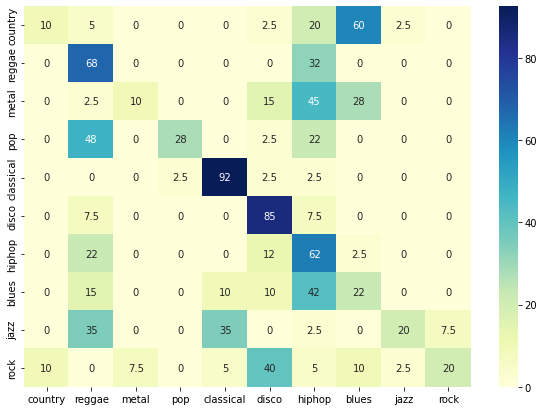

In [11]:
trainer.plot_confusion_matrix(test_dataloader)

In [12]:
trainer.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.50      0.10      0.17        40
      reggae       0.33      0.68      0.45        40
       metal       0.57      0.10      0.17        40
         pop       0.92      0.28      0.42        40
   classical       0.65      0.93      0.76        40
       disco       0.50      0.85      0.63        40
      hiphop       0.26      0.62      0.36        40
       blues       0.18      0.23      0.20        40
        jazz       0.80      0.20      0.32        40
        rock       0.73      0.20      0.31        40

    accuracy                           0.42       400
   macro avg       0.54      0.42      0.38       400
weighted avg       0.54      0.42      0.38       400



In [15]:
lr = 0.001
model_2 = VanillaConv1d().to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=lr)
model_2

VanillaConv1d(
  (batch_norm): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (input_layer): Sequential(
    (0): Conv1d(40, 128, kernel_size=(8,), stride=(1,), padding=(8,))
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (hidden_layer): Sequential(
    (0): Conv1d(128, 128, kernel_size=(8,), stride=(1,), padding=(8,))
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool1d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (out_linear): Linear(in_features=384, out_features=10, bias=True)
)

In [16]:
trainer_2 = CNNFbankTrainer(
    model=model_2, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=40)
trainer_2.train()

============================== EPOCH 1 =================================
Training accuracy 36.84
Training loss 1.8257
Validation accuracy 10.25
Validation loss 8.7685
============================== EPOCH 2 =================================
Training accuracy 56.56
Training loss 1.2068
Validation accuracy 20.25
Validation loss 3.4865
============================== EPOCH 3 =================================
Training accuracy 64.81
Training loss 0.9695
Validation accuracy 41.50
Validation loss 1.6488
============================== EPOCH 4 =================================
Training accuracy 73.47
Training loss 0.7549
Validation accuracy 53.50
Validation loss 1.2553
============================== EPOCH 5 =================================
Training accuracy 77.19
Training loss 0.6163
Validation accuracy 42.75
Validation loss 1.8761
============================== EPOCH 6 =================================
Training accuracy 84.16
Training loss 0.4803
Validation accuracy 46.75
Validation loss 1.582

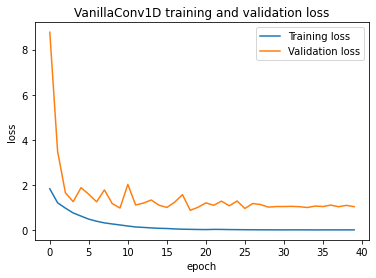

In [17]:
trainer_2.plot_loss("VanillaConv1D training and validation loss")

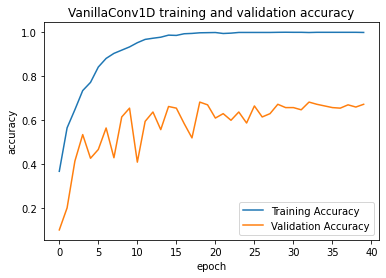

In [18]:
trainer_2.plot_accuracies("VanillaConv1D training and validation accuracy")

In [19]:
trainer_2.eval(test_dataloader)

(tensor([7, 4, 6, 4, 6, 2, 6, 7, 7, 4, 6, 3, 6, 5, 3, 6, 3, 7, 3, 0, 1, 6, 7, 4,
         7, 9, 5, 1, 9, 7, 0, 7, 3, 1, 6, 1, 1, 5, 1, 1, 3, 1, 6, 6, 7, 7, 4, 5,
         7, 2, 1, 7, 7, 3, 0, 7, 3, 4, 7, 5, 1, 7, 1, 7, 4, 3, 6, 3, 5, 7, 3, 5,
         1, 5, 8, 7, 8, 2, 2, 4, 5, 2, 3, 6, 5, 5, 6, 1, 6, 6, 4, 5, 1, 6, 7, 6,
         7, 7, 4, 6, 1, 6, 5, 1, 6, 1, 2, 8, 5, 2, 6, 7, 5, 3, 7, 2, 4, 4, 2, 2,
         9, 7, 7, 6, 1, 4, 5, 7, 7, 5, 3, 2, 3, 3, 6, 5, 5, 7, 5, 4, 7, 6, 2, 3,
         7, 6, 7, 1, 3, 9, 0, 4, 5, 4, 7, 3, 5, 5, 1, 5, 1, 7, 4, 4, 6, 1, 8, 7,
         7, 1, 7, 5, 3, 3, 6, 7, 8, 1, 6, 5, 1, 5, 7, 6, 1, 5, 0, 2, 0, 6, 4, 6,
         4, 6, 6, 7, 3, 4, 4, 5, 4, 5, 8, 4, 2, 7, 6, 6, 6, 6, 6, 6, 1, 6, 7, 4,
         1, 2, 5, 0, 6, 1, 6, 8, 2, 7, 7, 3, 3, 2, 5, 4, 4, 2, 2, 1, 2, 6, 1, 8,
         6, 7, 9, 5, 7, 6, 6, 7, 1, 7, 4, 0, 1, 7, 5, 7, 2, 4, 4, 2, 6, 2, 6, 5,
         7, 2, 6, 7, 1, 1, 1, 7, 5, 5, 4, 1, 1, 1, 6, 1, 0, 4, 6, 6, 5, 3, 2, 6,
         2, 2, 5, 6, 6, 6, 3

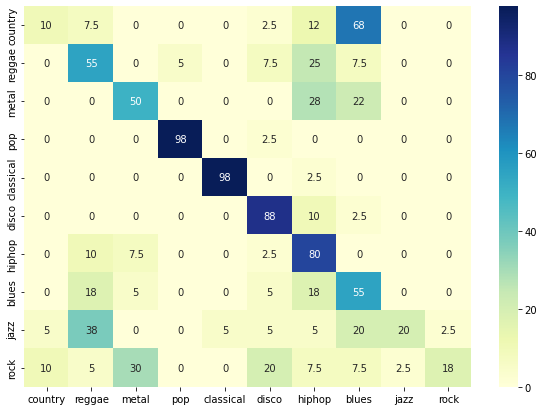

In [20]:
trainer_2.plot_confusion_matrix(test_dataloader)

In [21]:
trainer_2.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.40      0.10      0.16        40
      reggae       0.42      0.55      0.47        40
       metal       0.54      0.50      0.52        40
         pop       0.95      0.97      0.96        40
   classical       0.95      0.97      0.96        40
       disco       0.66      0.88      0.75        40
      hiphop       0.43      0.80      0.56        40
       blues       0.30      0.55      0.39        40
        jazz       0.89      0.20      0.33        40
        rock       0.88      0.17      0.29        40

    accuracy                           0.57       400
   macro avg       0.64      0.57      0.54       400
weighted avg       0.64      0.57      0.54       400

